In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from mlresearch.utils import set_matplotlib_style
from recgame.recourse import NFeatureRecourse
from recgame.populations import BasePopulation
from recgame.environments import WillingnessEnvironment
from recgame.utils import generate_synthetic_data

In [2]:
set_matplotlib_style(16)

# Some variables to define the problem
RNG_SEED = 42
N_CONTINUOUS = 2
N_CAT = 0
N_AGENTS = 100

# Environment variables
N_LOANS = 10  # np.array([20, 1, 10, 30, 0, 5, 50, 10, 40])
ADAPTATION = 0.5  # np.array([.2, .1, .3, .25, .1, .4, .05, .05, .2])
NEW_AGENTS = 10  # np.array([40, 10, 50, 5, 0, 100, 0, 0, 20])

df, _, categorical = generate_synthetic_data(N_AGENTS, N_CONTINUOUS, N_CAT, RNG_SEED)

df.head()

,f_0,f_1
0,0.601572,0.153339
1,0.750150,0.813522
2,-0.150345,0.065940
3,0.542613,0.394586
4,0.494400,0.215652


In [3]:
# from sklearn.linear_model import LinearRegression

# Monkey patching predict_proba since it's not implemented in linear models
# def predict_proba(self, X):
#     # expand_dims is used for api compatibility
#     if type(X) == pd.DataFrame:
#         X = X.values
#
#     scores = self.predict(X)
#     return np.stack([scores, scores], axis=1)

# def get_ranking(self, X):
#     scores = self.predict_proba(X)[:,1]
#     ranks = np.empty_like(scores)
#     ranks[np.argsort(scores)] = np.arange(scores.shape[0])
#     ranks = ranks.shape[0] - ranks
#     return ranks.astype(int)

# LinearRegression.predict_proba = predict_proba  # Necessary for computing scores, at least for now
# LinearRegression.get_ranking = get_ranking  # just because it might be useful

scorer = LogisticRegression()
scorer.coef_ = np.array([[0.3, 0.7]])
scorer.intercept_ = 0
scorer.classes_ = np.array([0, 1])
scorer.feature_names_in_ = df.columns

In [10]:
# Define the necessary components to run simulation
population = BasePopulation(df, categorical=categorical)
population.action_set_.ub = [2, 2]
recourse = NFeatureRecourse(scorer)
environment = WillingnessEnvironment(
    population,
    recourse,
    n_loans=N_LOANS,
    adaptation=ADAPTATION,
    new_agents=NEW_AGENTS,
    random_state=RNG_SEED,
)

environment.run_simulation(20)

<Axes: title={'center': 'Population scores over 21 time steps'}, xlabel='Step', ylabel='Score'>

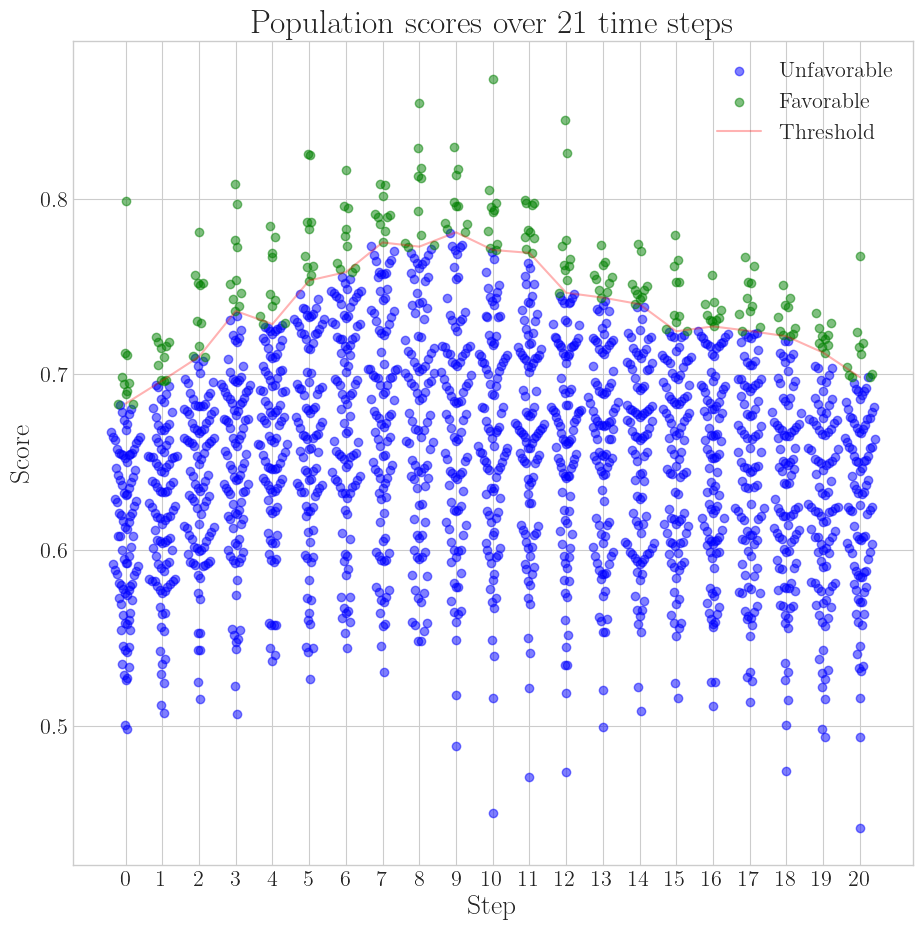

In [11]:
environment.plot.agent_scores()

<Axes: title={'center': 'Population at t=5'}, xlabel='f_0', ylabel='f_1'>

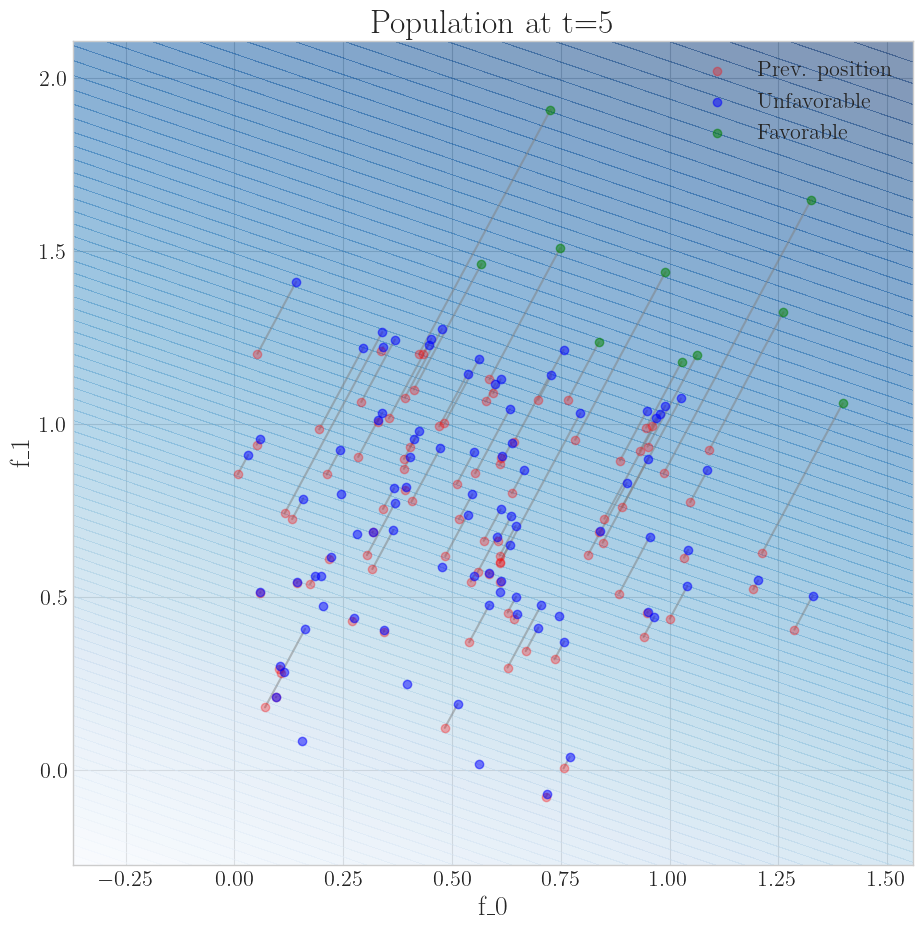

In [13]:
environment.plot.scatter(5)